In [4]:
import os
import pandas as pd
from PIL import Image
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Softmax, BatchNormalization, Rescaling
from tensorflow.keras.utils import image_dataset_from_directory
import keras
from keras.optimizers import Adam

In [5]:
image_size = (178, 218, 3)

In [6]:
targets = pd.read_csv('identity_CelebA.txt', delimiter=' ', header=None, names=['file','target'])
targets['target']

0         label
1          2880
2          2937
3          8692
4          5805
          ...  
202595     9761
202596     7192
202597     9852
202598     5570
202599    10101
Name: target, Length: 202600, dtype: object

In [7]:
targets['target'].value_counts()[:100]

target
2820    35
3227    35
3782    35
3699    34
3745    34
        ..
3270    30
4828    30
9789    30
2348    30
1210    30
Name: count, Length: 100, dtype: int64

In [8]:
im = Image.open(f'data/{os.listdir("data")[0]}')
im.verify()

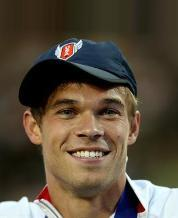

In [9]:
im = Image.open(f'data/000501.jpg')
im.show()

In [10]:
# import os
# from PIL import Image

# count = 0
# for filename in os.listdir('data'):
#     try:
#         im = Image.open(f'data/{filename}')
#         im.verify()
#     except:
#         print(f"Image {count}, filename: {filename} not okay")
#     finally:
#         count += 1


In [12]:
training, validation = image_dataset_from_directory(directory='data', 
                                                    validation_split=0.2, 
                                                    subset='both', 
                                                    seed=42, 
                                                    image_size=(178,218), 
                                                    labels=list(targets['target'][:-1]), 
                                                    label_mode='int')

Found 202599 files belonging to 10178 classes.
Using 162080 files for training.
Using 40519 files for validation.


2024-05-02 15:52:05.783951: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-02 15:52:05.887123: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-02 15:52:05.887168: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-02 15:52:05.889990: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-02 15:52:05.890035: I tensorflow/compile

In [14]:
num_classes = len(training.class_names)

## Base Model

In [ ]:
training.element_spec

<_BatchDataset element_spec=(TensorSpec(shape=(None, 178, 218, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
model = Sequential()
model.add(Rescaling(1./255, input_shape=(178,218,3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(((2,2))))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(optimizer=Adam(clipnorm=2), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 178, 218, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 176, 216, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 88, 108, 32)      0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 88, 108, 32)      128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 86, 106, 64)       18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 53, 64)      

In [16]:
history = model.fit(training, epochs=1, validation_data=validation)

2024-05-02 15:52:21.871698: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [162080]
	 [[{{node Placeholder/_0}}]]
2024-05-02 15:52:21.871937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [162080]
	 [[{{node Placeholder/_4}}]]
2024-05-02 15:52:22.334927: W tensorflow/core/framework/op_kernel.cc:1807] OP_REQUIRES failed at cast_op.cc:121 : UNIMPLEMENTED: Cast string to float is not supported


UnimplementedError: Graph execution error:

Detected at node 'Cast_1' defined at (most recent call last):
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 701, in start
      self.io_loop.start()
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 534, in dispatch_queue
      await self.process_one()
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 523, in process_one
      await dispatch(*args)
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 429, in dispatch_shell
      await result
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 767, in execute_request
      reply_content = await reply_content
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 429, in do_execute
      res = shell.run_cell(
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_1085/4108281976.py", line 1, in <module>
      history = model.fit(training, epochs=1, validation_data=validation)
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1055, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1149, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/keras/utils/metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/keras/metrics/base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/home/aidanholc/anaconda3/envs/tf/lib/python3.9/site-packages/keras/metrics/base_metric.py", line 676, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_1'
2 root error(s) found.
  (0) UNIMPLEMENTED:  Cast string to float is not supported
	 [[{{node Cast_1}}]]
  (1) CANCELLED:  Function was cancelled before it was started
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_2111]

In [ ]:
history.history['accuracy']

[1.8509377696318552e-05]